# Obliczenia Naukowe
### Labolatoria, Lista 4, poprawiona<br/>Kamil Matejuk, 250135

## Zad 1
*Napisać funkcję obliczającą ilorazy różnicowe<br/>
`function ilorazyRoznicowe (x::Vector{Float64}, f::Vector{Float64})`<br/><br/>
**Dane:**<br/>
`x` – wektor długości n+1 zawierający węzły $x_0,\dots, x_n$<br/>
`f` – wektor długości n+1 zawierający wartości interpolowanej funkcji w węzłach $f(x_0), \dots, f(x_n)$<br/>
**Wyniki:**<br/>
`fx` – wektor długości n+1 zawierający obliczone ilorazy różnicowe, gdzie*<br/> fx[1]=$f[x_0]$, fx[2]=$f[x_0, x_1], \dots $fx[n+1]=$f[x_0, \dots, x_n]$

In [6]:
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    n = length(f)
    ir = copy(f)
    for j in 2:n
        for i in n:-1:j
            ir[i] = (ir[i] - ir[i-1]) / (x[i] - x[i-j+1])
        end
    end
    return ir
end

ilorazyRoznicowe (generic function with 1 method)

**Omówienie**<br/>
Ilorazy róznicowe zerowego i pierwszego rzędu są równe:<br/><br/>
$$ f[x_0] = f(x_0) $$
$$ f[x_0, x_1] = \frac{f[x_1] - f[x_0]}{x_1 - x_0} $$<br/>
Ilorazy wyższych rzędów oblicza się za pomoca wzoru rekurencyjnego:<br/><br/>
$$ f[x_i, x_{i+1}, \dots, x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \dots, x_{i+k}] - f[x_i, x_{i+1}, \dots, x_{i+k-1}]}{x_{i+k} - x_i} $$<br/>
Aby obliczyć wszystkie ilorazy różnicowe, znając wartości funkcji w danych punktach, wykorzystuje się metodę tablicy trójkatnej:<br/>

|       |          |               |         |                             |                         |
|:-----:|:--------:|:-------------:|:-------:|:---------------------------:|:-----------------------:|
| $x_0$ | $f[x_0]$ | | | |
| $x_1$ | $f[x_1]$ | $f[x_0, x_1]$ | | | |
| $\vdots$ | $\vdots$ | | | |
| $x_{n-1}$ | $f[x_{n-1}]$ | $f[x_{n-2}, x_{n-1}]$ | $\dots$ | $f[x_0, x_1, ..., x_{n-1}]$ | |
| $x_n$ | $f[x_n]$ | $f[x_{n-1}, x_n]$ | $\dots$ | $f[x_1, x_2, ..., x_n]$ | $f[x_0, x_1, ..., x_n]$ |

Algorytm na początku kopiuje wartości interpolowanej funkcji jako wartości początkowe ilorazów różnicowych $f[x_0], f[x_1], \dots, f[x_n]$. Nastepnie wykonuje $n$ razy operację opisaną powyżej:
$$ fx_i = \frac{fx_i - fx_{i-1}}{x_i - x_{i-j}} $$<br/>
Wykonując tą operację na jednej tej samej tablicy, finalnie pozostaną w niej wartości $f[x_0], f[x_0, x_1], \dots, f[x_0, x_1, ..., x_n]$.

#### Program testujący

In [33]:
using Printf

a = 0
b = 6
n = 7
x = [Float64(a + k*(b-a+1)/n) for k in 0:(n-1)]
f = [Float64(i^3) for i in x] # function f(x) = x^3
ir = ilorazyRoznicowe(x, f)
println("n      x              f(x)           fx[x]")
for i in 1:n
    xi = x[i]
    fi = f[i]
    iri = ir[i]
    println("$(@sprintf("%-5s", i)) $(@sprintf("%-15s", xi)) $(@sprintf("%-15s", fi)) $(@sprintf("%-15s", iri))")
end

n      x              f(x)           fx[x]
1     0.0             0.0             0.0            
2     1.0             1.0             1.0            
3     2.0             8.0             3.0            
4     3.0             27.0            1.0            
5     4.0             64.0            0.0            
6     5.0             125.0           0.0            
7     6.0             216.0           0.0            


## Zad 2
*Napisać funkcję obliczającą wartość wielomianu interpolacyjnego stopnia $n$ w postaci Newtona $N_n(x)$ w punkcie $x = t$ za pomocą uogólnionego algorytmu Hornera, w czasie $O(n)$.<br/>
`function warNewton (x::Vector{Float64}, fx::Vector{Float64}, t::Float64)`<br/><br/>
**Dane:**<br/>
`x` – wektor długości n+1 zawierający węzły $x_0,\dots, x_n$<br/>
`fx` – wektor długości n+1 zawierający obliczone ilorazy różnicowe, gdzie* fx[1]=$f[x_0]$, fx[2]=$f[x_0, x_1], \dots $fx[n+1]=$f[x_0, \dots, x_n]$<br/>
`t` – *punkt w którym nalezy obliczyć wartość wielomianu<br/> 
**Wyniki:**<br/>
`nt` – wartość wielomianu w punkcie t*

In [216]:
function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)
    n = length(fx)
    nt = fx[n]
    for i in n-1:-1:1
        nt = nt*(t-x[i])+fx[i]
    end
    return nt
end

warNewton (generic function with 1 method)

**Omówienie**<br/>
Schemat Hornera jest to sposób obliczania wartości wielomianu dla danej wartości argumentu wykorzystujący minimalną liczbę mnożeń.<br/><br/>
Znając ilorazy różnicowe, można wykorzystać zasadę Homera, mówiącą że wielomian:<br/><br/>
$$ W(x) = fx[0]+fx[1]x+fx[2]x^2+fx[3]x^3+\dots+fx[n]x^n $$<br/>
można zapisać w postaci:<br/><br/>
$$ W(x) = fx[0]+x\bigg(fx[1]+x\Big(fx[2]+x\big(fx[3]+\dots+x(fx[n-1]+xfx[n])\big) \Big) \bigg) $$<br/>
Nastepnie definiując<br/>
$$\begin{aligned}b_{n}&:=fx[n],\\b_{n-1}&:=fx[n-1]+b_{n}x,\\b_{n-2}&:=fx[n-2]+b_{n-1}x\\&\;\vdots \\b_{0}&:=fx[0]+b_{1}x.\end{aligned}$$<br/>
i podstawiając $x = t$, otrzymane $b_{0}$ będzie równe $W(t)$.<br/>
Wykonane jest $n$ dodawań i $n$ mnożeń - złożoność $o(n)$.

#### Program testujący

In [200]:
using Printf

a = 0
b = 100
n = 11
x = [Float64(a + k*(b-a)/(n-1)) for k in 0:(n-1)]
f = [Float64(i^3) for i in x] # function f(x) = x^3
ir = ilorazyRoznicowe(x, f)
println(" x              f(x)             t              nt(t)")
for i in 1:n
    xi = x[i]
    fi = f[i]
    nti = warNewton(x, ir, Float64(xi))
    println("$(@sprintf("%-15s", xi)) $(@sprintf("%-15s", fi)) $(@sprintf("%-15s", Float64(i))) $(@sprintf("%-15s", nti))")
end

 x              f(x)             t              nt(t)
0.0             0.0             1.0             0.0            
10.0            1000.0          2.0             1000.0         
20.0            8000.0          3.0             8000.0         
30.0            27000.0         4.0             27000.0        
40.0            64000.0         5.0             64000.0        
50.0            125000.0        6.0             125000.0       
60.0            216000.0        7.0             216000.0       
70.0            343000.0        8.0             343000.0       
80.0            512000.0        9.0             512000.0       
90.0            729000.0        10.0            729000.0       
100.0           1.0e6           11.0            1.0e6          


## Zad 3
*Znając współczynniki wielomianu interpolacyjnego w postaci Newtona $c0 = f[x0], c1 = f[x0, x1], c2 = f[x0, x1, x2],\dots, cn = f[x0, \dots , xn]$ (ilorazy różnicowe) oraz węzły $x0, x2, \dots , xn$ napisać funkcję obliczającą, w czasie $O(n^2)$, współczynniki jego postaci naturalnej $a_0, \dots , a_n$ tzn.$a_nx^n + a_{n−1}x^{n−1} + \dots + a_1x + a_0$<br/>
`function naturalna (x::Vector{Float64}, fx::Vector{Float64})`<br/><br/>
**Dane:**<br/>
`x` – wektor długości n+1 zawierający węzły $x_0,\dots, x_n$<br/>
`fx` – wektor długości n+1 zawierający obliczone ilorazy różnicowe, gdzie* fx[1]=$f[x_0]$, fx[2]=$f[x_0, x_1], \dots $fx[n+1]=$f[x_0, \dots, x_n]$<br/>
**Wyniki:**<br/>
`a` – *wektor długości n+1 zawierający obliczone współczynniki postaci naturalnej, gdzie* a[1]=$a_0$, a[2]=$a_1, \dots $a[n+1]=$a_n$<br/>

In [145]:
function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    n = length(x)

    W = [fx[1]]
    xx = [1.0]
    for i in 2:n
        # iloczyn
        push!(xx, 0.0)
        for j in length(xx):-1:2
            xx[j] = xx[j] + xx[j-1] * -x[i-1]
        end
        tempxx = copy(xx)
        for j in 1:length(tempxx)
            tempxx[j] = tempxx[j] * fx[i]
        end
        # wielomian
        pushfirst!(W, 0.0)
        for j in 1:length(W)
            W[j] = W[j] + tempxx[j]
        end
    end
    return reverse(W)
end

naturalna (generic function with 1 method)

**Omówienie**<br/>
Algorytm wykorzystuje postać<br/><br/>
$$ W(x) = fx[0]+fx[1](x-x[0])+fx[2](x-x[0])(x-x[1])+\dots+fx[n](x-x[0])(x-x[1])\dots(x-x[n-1])$$<br/>
i konstruuje wielomian po kolei, dla każdego czynnika, tak jak jest to przedstawione we wzorze.<br/><br/>
Współczynniki wielomianu przechowywane są w tabeli, zaczynając od najwyższej do najniższej potęgi.<br/><br/>
Algorytm w każdym kroku powiększa poprzedni iloczyn $(x-x[0])\dots(x-x[i-1])$ o $(x-x[i])$. Nastepnie przemnaża go przez $fx[i+1]$ i dodaje do liczonego wielomianu $W$.

#### Program testujący

In [146]:
using Printf

a = 0
b = 5
n = 6
x = [Float64(a + k*(b-a)/n) for k in 0:n]
f = [Float64(i^3) for i in x] # function f(x) = x^3
fx = ilorazyRoznicowe(x, f)

println(naturalna(x, fx))

[0.0, -2.0440439464487605e-14, 5.4769460571751294e-14, 0.9999999999999487, 2.1643797865067425e-14, -4.176659018639839e-15, 2.989608560710621e-16]


## Zad 4
*Napisać funkcję, która zinterpoluje zadaną funkcję f(x) w przedziale [a, b] za pomocą wielomianu interpolacyjnego stopnia n w postaci Newtona. Następnie narysuje wielomian interpolacyjny
i interpolowaną funkcję. <br/>
W interpolacji użyć węzłów równoodległych.<br/>
Nie wyznaczać wielomianu interpolacyjnego w jawnej postaci. Należy skorzystać z funkcji `ilorazyRoznicowe` i `warNewton`.*<br/>
`function rysujNnfx(f,a::Float64,b::Float64,n::Int)`<br/><br/>
**Dane:**<br/>
*`f` - funkcja zadana jako anonimowa funkcja<br/>
`a`,`b` - przedział interpolacji<br/>
`n` - stopień wielomianu interpolacyjnego<br/>*
**Wyniki**<br/>
*funkcja rysuje wielomian interpolacyjny i interpolowaną funkcję w przedziale [a,b]*

In [220]:
using Plots

function rysujNnfx(f::Function, a::Float64, b::Float64, n::Int)
    # dla obliczeń
    x = [Float64(a + k*(b-a)/n) for k in 0:n]
    fx = [f(i) for i in x]
    ir = ilorazyRoznicowe(x, fx)
    # dla wykresu
    x2 = [Float64(a + k*(b-a)/(50*n)) for k in 0:(50*n)]
    fx2 = [f(i) for i in x2]
    wi = [warNewton(x, ir, i) for i in x2]

    plot(x2, fx2, label="funkcja", legend=:topleft)
    plot!(x2, wi, label="wielomian interpolacyjny")
end


rysujNnfx (generic function with 1 method)

**Omówienie**<br/>
Program wybiera n równoodległych punktów z zadanego przedziału (włączając końce), a następnie generuje ilorazy różnicowe na podstawie wartości funkcji w tych punktach. Potem (wybierając 10-krotnie gęstszy podział) sprawdza przybliżoną wartość funkcji przez wielomian interpolacyjny wykorzystując `warNewton`.

#### Program testujący

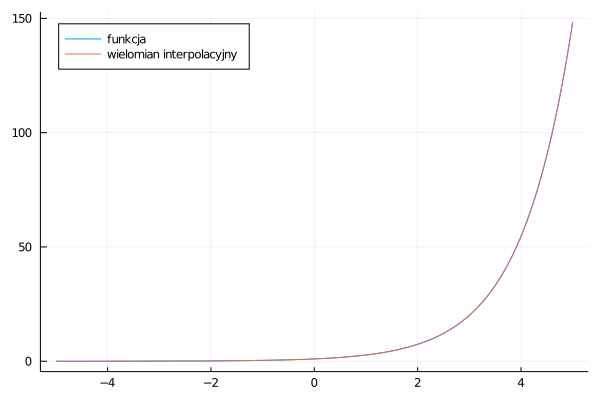

In [221]:
function f4(x)
    return exp(x)
end

rysujNnfx(f4, -5.0, 5.0, 8)

## Zad 5
*Przetestować funkcję `rysujNnfx(f,a,b,n)` na następujących przykładach:*

### 5.1
$e^x$, $[0, 1]$, $n = 5, 10, 15$

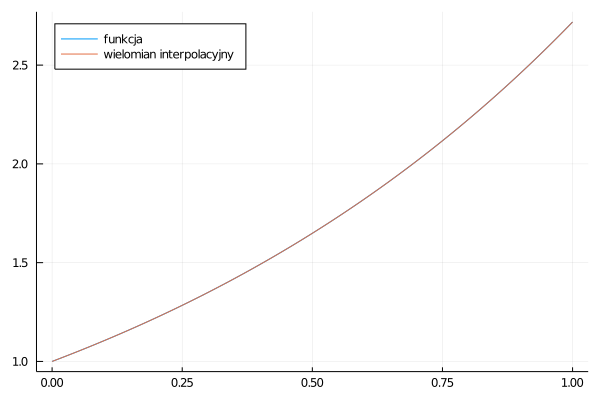

In [222]:
rysujNnfx(x->exp(x), 0.0, 1.0, 5)

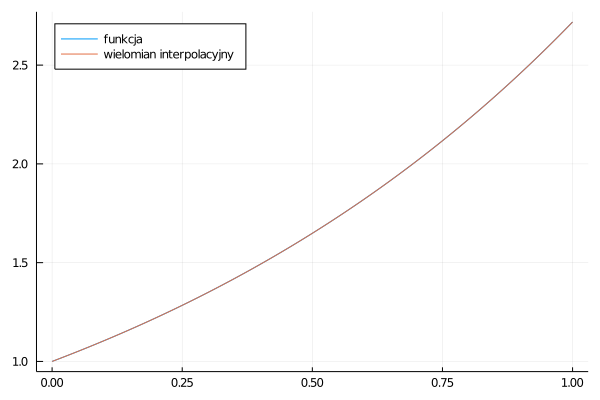

In [223]:
rysujNnfx(x->exp(x), 0.0, 1.0, 10)

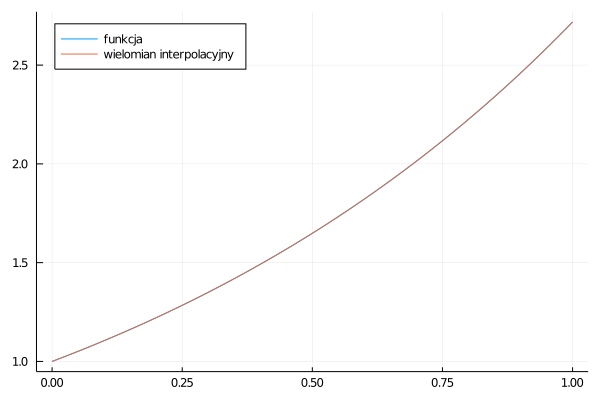

In [224]:
rysujNnfx(x->exp(x), 0.0, 1.0, 15)

### 5.2
$x^2sinx$, $[-1, 1]$, $n = 5, 10, 15$

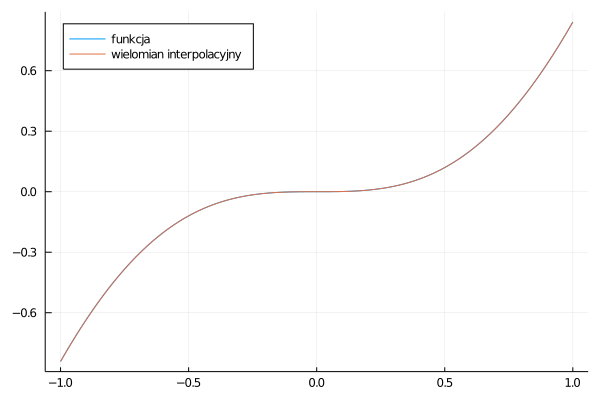

In [225]:
rysujNnfx(x->x*x*sin(x), -1.0, 1.0, 5)

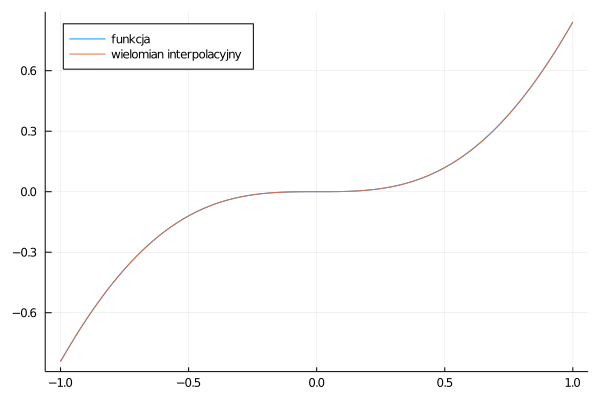

In [226]:
rysujNnfx(x->x*x*sin(x), -1.0, 1.0, 10)

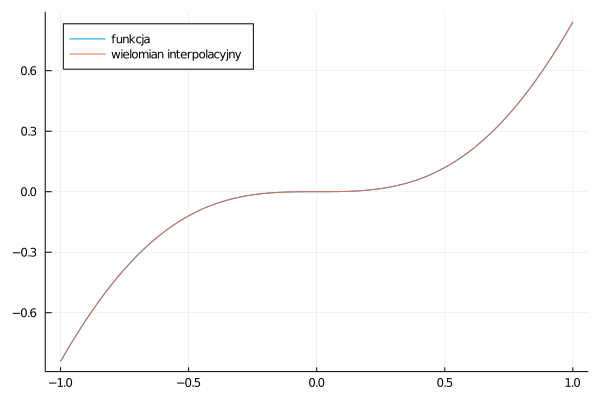

In [227]:
rysujNnfx(x->x*x*sin(x), -1.0, 1.0, 15)

**Wnioski**<br/>
Obie funkcje $e^x$ i $x^2sin(x)$ są zbieżne z wygenerowanymi wielomianami interpolacyjnymi. Zwiększając stopień $n$, przybliżenie wielomianem interpolacyjnym jest coraz dokładniejsze.

## Zad 6
*Przetestować funkcję `rysujNnfx(f,a,b,n)` na następujących przykładach (zjawisko rozbieżności):*

### 6.1
$|x|$, $[-1, 1]$, $n = 5, 10, 15$

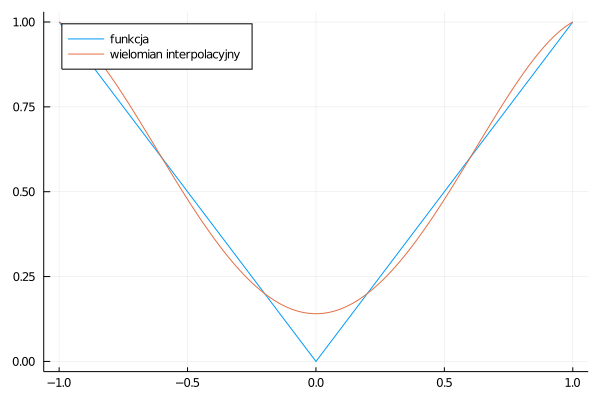

In [228]:
rysujNnfx(x->abs(x), -1.0, 1.0, 5)

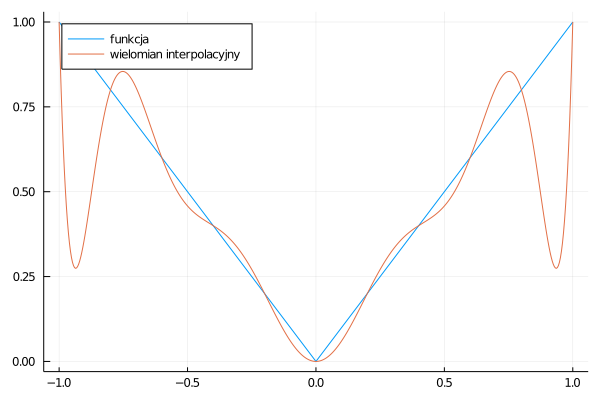

In [229]:
rysujNnfx(x->abs(x), -1.0, 1.0, 10)

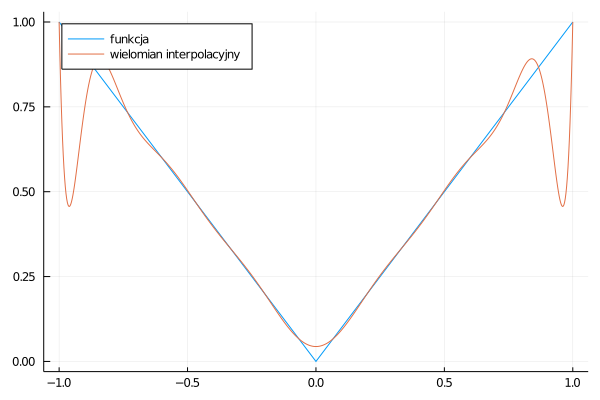

In [230]:
rysujNnfx(x->abs(x), -1.0, 1.0, 15)

**Wnioski**<br/>
Przybliżenie funkcji $|x|$ dla stopnia n = 5, jest bardzo niedokładne w okolicach 0, ponieważ funkcja ta nie ma pochodnej w punkcie x = 0. Zwiększenie stopnia wielomianu polepszyło przybliżenie funkcji w okolicach 0, jednak znacznie pogorszyło przybliżenie na krańcach przedziału. Kolejne zwiększenie stopnia polepszyło przybliżenie na krańcach przedziału, jednak spowodowało również pogorszenie przybliżenia w okolicach zera.<br/>
Da się zauważyć zależność, że dla nieparzystych $n$ mamy gorsze przybliżenie zera, ale mniejsze rozbieżności na końcach przedziałów. Natomiast dla parzystego $n$ wartość w zerze jest dokładniejsza, ale na krańcach przedziału przybliżenie jest bardzo złe.

### 6.2
$\frac{1}{1+x^2}$, $[-5, 5]$, $n = 5, 10, 15$

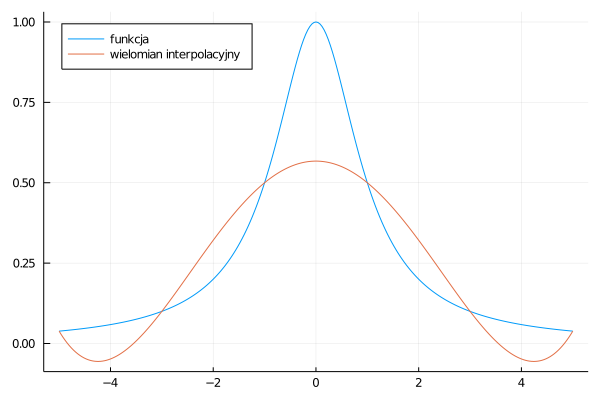

In [231]:
rysujNnfx(x->1/(1+x*x), -5.0, 5.0, 5)

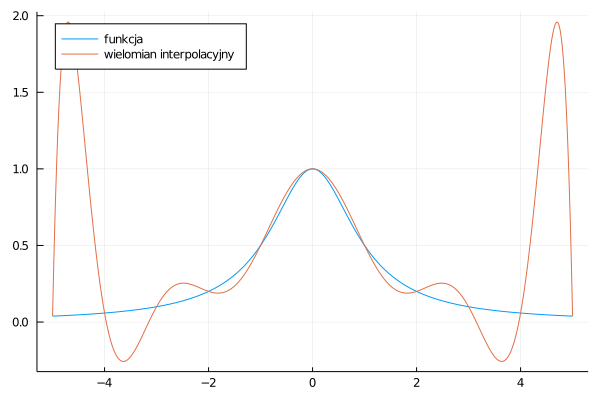

In [232]:
rysujNnfx(x->1/(1+x*x), -5.0, 5.0, 10)

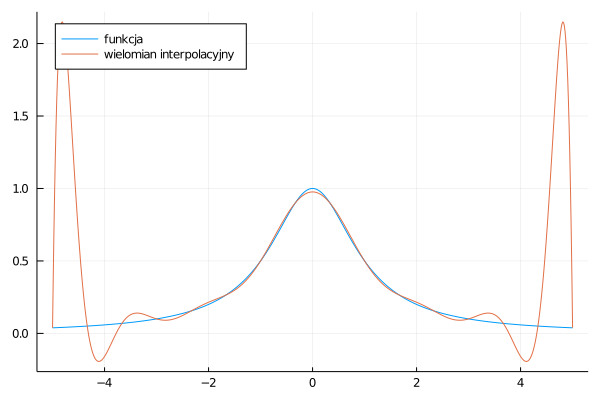

In [233]:
rysujNnfx(x->1/(1+x*x), -5.0, 5.0, 15)

**Wnioski**<br/>
W przypadku funkcji $\frac{1}{(1+x^2}$ dla n = 5 nie zwraca wyników dokładnych. Zwiększenie stopnia wielomianu $n$ zdecydowanie poprawiło przybliżenie w centralnej części przedziału, jednak na krańcach przedziału, tak jak w przypadku poprzedniej funkcji, przybliżenie jest bardzo niedokładne. Występuje tu zjawisko Runge’go - typowe zjawisko dla interpolacji przy stałej odległości między węzłami, gdzie zwiększenie stopnia wielomianu niekoniecznie oznacza zwiększenie dokładności wyniku.